<a href="https://colab.research.google.com/github/Piyush01Bhatt/Deep-Learning/blob/master/Image_Classification_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo pip install -q tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 4.3MB 49.2MB/s 
     |████████████████████████████████| 501kB 48.6MB/s 


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!wget 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

--2019-09-06 13:19:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.25.112, 2404:6800:4004:80b::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.25.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  60.2MB/s    in 1.1s    

2019-09-06 13:19:28 (60.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [6]:
!pwd

/content


In [7]:
PATH = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
print(train_dir)
print(validation_dir)

/content/cats_and_dogs_filtered/train
/content/cats_and_dogs_filtered/validation


In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats') 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [10]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
batch_size = 128
epochs = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                          horizontal_flip = True,
                                          rotation_range = 45,
                                          zoom_range = 0.5,
                                          width_shift_range=.15,
                                          height_shift_range=.15) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,
                                                horizontal_flip = True,
                                                rotation_range = 45,
                                                zoom_range = 0.5,
                                                width_shift_range=.15,
                                                height_shift_range=.15) # Generator for our validation data

In [13]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


##**CNN Classification Model**

In [15]:
img_input = keras.Input(shape = (IMG_WIDTH,IMG_HEIGHT,3))
x = Conv2D(32, 3, padding='same', activation='relu')(img_input)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=img_input, outputs=output, name='mnist_model')
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       

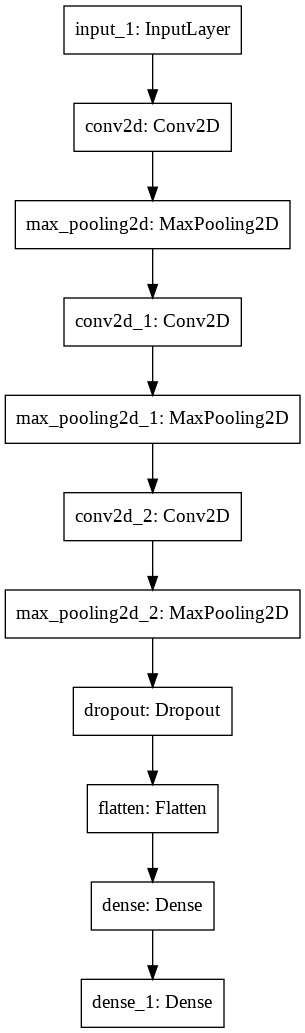

In [16]:
tf.keras.utils.plot_model(model, 'my_first_model.png')

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/50


W0906 13:19:52.820260 140104139802496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


15/15 [==============================] - 21s 1s/step - loss: 1.1933 - accuracy: 0.5037 - val_loss: 0.6925 - val_accuracy: 0.5134
Epoch 2/50
15/15 [==============================] - 18s 1s/step - loss: 0.6921 - accuracy: 0.4957 - val_loss: 0.6869 - val_accuracy: 0.5112
Epoch 3/50
15/15 [==============================] - 18s 1s/step - loss: 0.6905 - accuracy: 0.5342 - val_loss: 0.6836 - val_accuracy: 0.5815
Epoch 4/50
15/15 [==============================] - 18s 1s/step - loss: 0.6847 - accuracy: 0.5598 - val_loss: 0.6763 - val_accuracy: 0.5949
Epoch 5/50
15/15 [==============================] - 18s 1s/step - loss: 0.6670 - accuracy: 0.5775 - val_loss: 0.6848 - val_accuracy: 0.5592
Epoch 6/50
15/15 [==============================] - 18s 1s/step - loss: 0.6550 - accuracy: 0.6135 - val_loss: 0.6470 - val_accuracy: 0.6283
Epoch 7/50
15/15 [==============================] - 18s 1s/step - loss: 0.6868 - accuracy: 0.5768 - val_loss: 0.6694 - val_accuracy: 0.5725
Epoch 8/50
15/15 [=============

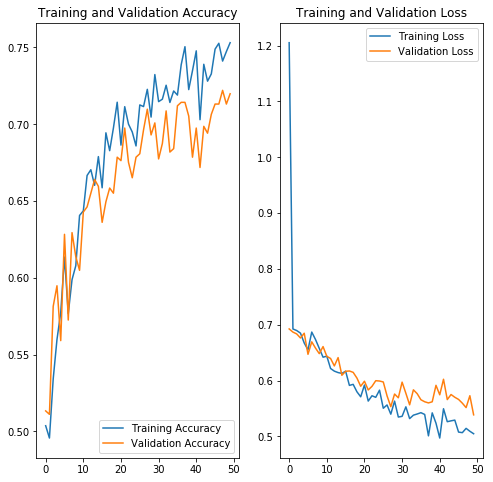

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**